In [1]:
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph
from random import randint
import matplotlib.pyplot as plt
import torch

import os
import sys

In [2]:
def erdosrenyi_generator(n, p):
    """ 
    Args: 
    n: given node number
    p: possibility for edge creation;
       note here p can be calculated given desired average connecting degree acd 
       through math: p = acd / (n - 1), for n > 100 simplified as: p = acd / n

    """
    G_er = erdos_renyi_graph(n, p, directed=True)
    return G_er


def addedges(G, k):         
    """generate multi-directed graph on basis of the passed-in (directed) gragh

    For each time, copy existing edges once if true; nothing happens while false
    (true/false generated by randint). We aim here 1.to randomly increase some of the existing edges; 
    2.increase it to random number. 
    We do this aiming at creating the raw training set background with sufficient randomness. 

    Args:
    G: dealt network
    k: number of repeat time; choose 3 if there's no preference

    Returns:
    Multi-directed graph G with added edges
    """
    G = nx.MultiDiGraph(G)
    edgelistG = list(G.edges(data=False))

    for i in range (k):
        idx = [randint(0, 1) for p in range(0,len(edgelistG))]
        added_edge = []
        for j in range (len(edgelistG)):
            if idx[j]:
                added_edge.append(edgelistG[j])
        G.add_edges_from(added_edge)
    nx.set_node_attributes(G, 0, "suspicious")
    return G

def generateDiamond(BG, startNode, endNode, splitDegree, maxDepth, useBackground):
    G = nx.MultiDiGraph()
    G.add_node(startNode, pos=(1,1))
    G.add_node(endNode, pos=(10,10))
  
    for i in range(splitDegree):
        pathGraph = generateRandomLengthPath(BG, startNode, endNode, maxDepth, useBackground)
        G.update(pathGraph)
    nx.set_node_attributes(G, 1, "suspicious")
    return G



def addPattern(G, pattern):
    G.update(pattern)

def return_labels(G):
    nodes = G.nodes
    labels = nx.get_node_attributes(G,"suspicious")
    y = []
    for label in labels.values():
        y.append(label)
    y = np.asarray(y)
    return y

def generateRandomLengthPath(BG, startNode, endNode, maxDepth, useBackground):
    nodes = list(BG.nodes)
    n = len(nodes)
    
    existingDiamonds = nx.get_node_attributes(BG, "suspicious")
    diamondNodes = [k for k, v in existingDiamonds.items() if v == 1]

    v=[]
    e=[]
    #for i in range(randint(1, maxDepth)):
    for i in range(maxDepth):
      newNode = randint(0, n-1)
      while newNode in diamondNodes:
        newNode = randint(0, n-1)
      if not useBackground:
        while newNode in nodes:
          newNode = randint(n+1, n+n+n)
          
      v.append(newNode)

    for y in range(len(v)-1):
        e.append((v[y], v[y+1]))
    G = nx.MultiDiGraph(e)
    G.add_nodes_from([startNode, endNode])
    G.add_edges_from([(startNode,v[0]),(v[-1], endNode)])
    return G

In [3]:
G = nx.MultiDiGraph
num_nodes = 100
G_er = erdosrenyi_generator(n=num_nodes, p = 3/num_nodes)
G = addedges(G_er, k=1)

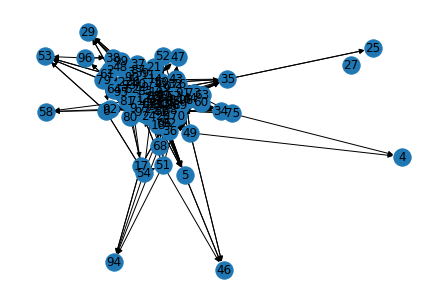

In [4]:
nx.draw_spring(G, with_labels=True)

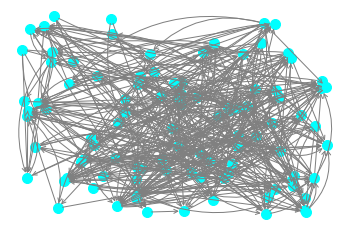

In [5]:
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = '#00ffff', node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()

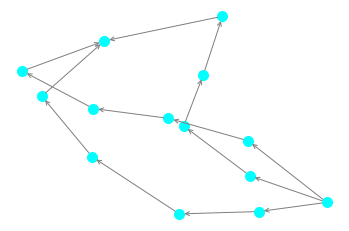

In [6]:
diamond = generateDiamond(G, 19, 78, 3, 4, True)
pos = nx.spring_layout(diamond)
nx.draw_networkx_nodes(diamond, pos, node_color = '#00ffff', node_size = 100, alpha = 1)
ax = plt.gca()
for e in diamond.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()

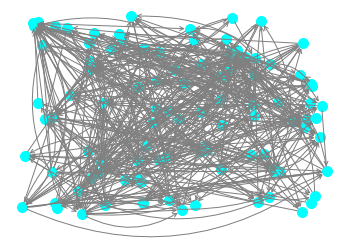

In [7]:
addPattern(G, diamond)
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = '#00ffff', node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()

In [8]:
labels = nx.get_node_attributes(G,"suspicious")
print(labels)
colormap = []

for key,value in labels.items():
    if value == 1:
        colormap.append('#EE4B2B')
    else:
        colormap.append('#00ffff')

print(colormap)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 1, 10: 1, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 1, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 1, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 1, 44: 0, 45: 0, 46: 0, 47: 0, 48: 1, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 1, 70: 0, 71: 0, 72: 0, 73: 1, 74: 1, 75: 0, 76: 0, 77: 0, 78: 1, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 1, 87: 1, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 1, 96: 0, 97: 0, 98: 0, 99: 0}
['#00ffff', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#EE4B2B', '#00ffff', '#EE4B2B', '#EE4B2B', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#EE4B2B', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#00ffff', '#00ffff', 

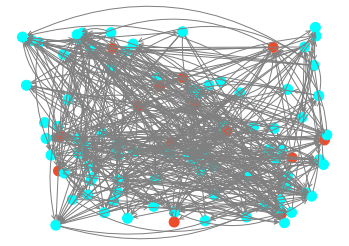

In [9]:
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = colormap, node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load('models/gat_300_2').to(device)

Error: Canceled future for execute_request message before replies were done